<a href="https://colab.research.google.com/github/Sumit-Nayek/Data-Analytics-ans-Statistics-Assignment/blob/main/Code_mannual_assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Implement a function _move_obstacles inside the GridWorld class.

Each obstacle can move to an adjacent (up, down, left, right) empty cell with a 50% probability after every step.

Update the Q-Learning logic to handle this dynamic grid.

Train the agent for 1000 episodes and analyze:

Total rewards over episodes

 Q-table convergence
Plot the learning curve (total rewards vs. episodes) to showcase how the agent adapts.

Episode: 50, Total Reward: 69, Epsilon: 0.6050
Episode: 100, Total Reward: 64, Epsilon: 0.3660
Episode: 150, Total Reward: 72, Epsilon: 0.2215
Episode: 200, Total Reward: 17, Epsilon: 0.1340
Episode: 250, Total Reward: 83, Epsilon: 0.0811
Episode: 300, Total Reward: 83, Epsilon: 0.0490
Episode: 350, Total Reward: 83, Epsilon: 0.0297
Episode: 400, Total Reward: 2, Epsilon: 0.0180
Episode: 450, Total Reward: 73, Epsilon: 0.0109
Episode: 500, Total Reward: 93, Epsilon: 0.0100


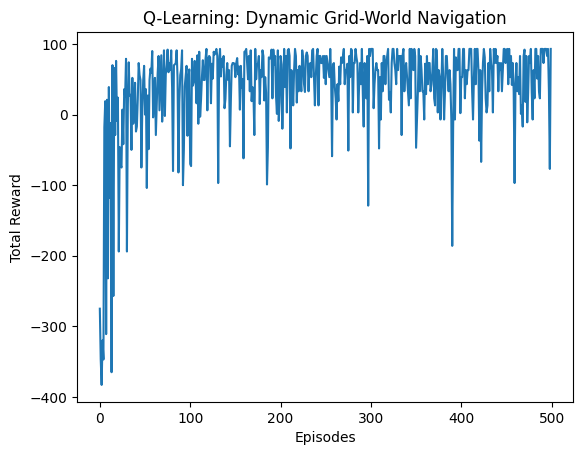

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Grid-World Environment with Moving Obstacles
class DynamicGridWorld:
    def __init__(self, size=5):
        self.size = size
        self.reset()

    def reset(self):
        self.agent_pos = [0, 0]  # Start position
        self.goal_pos = [4, 4]   # Goal position
        self.obstacles = self._generate_obstacles()
        self.steps = 0  # Step counter
        return self.agent_pos

    def _generate_obstacles(self):
        # Generate a set of 5 unique random obstacle positions
        obstacles = set()
        while len(obstacles) < 5:
            pos = (random.randint(0, self.size-1), random.randint(0, self.size-1))
            if pos != (0, 0) and pos != (4, 4):  # Ensure obstacles are not at agent or goal positions
                obstacles.add(pos)
        return [list(pos) for pos in obstacles]

    def _move_obstacles(self):
        # Randomly move each obstacle to an adjacent valid position
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        new_obstacles = []
        for obs in self.obstacles:
            if random.random() < 0.5:  # 50% chance to move the obstacle
                move = random.choice(moves)
                new_pos = [obs[0] + move[0], obs[1] + move[1]]
                # Check for boundaries and conflicts
                if 0 <= new_pos[0] < self.size and 0 <= new_pos[1] < self.size and new_pos != self.goal_pos:
                    new_obstacles.append(new_pos)
                else:
                    new_obstacles.append(obs)
            else:
                new_obstacles.append(obs)
        self.obstacles = new_obstacles

    def step(self, action):
        reward = -1
        self.steps += 1

        # Define movements: up, down, left, right
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}
        new_pos = [self.agent_pos[0] + moves[action][0], self.agent_pos[1] + moves[action][1]]

        # Check for boundaries
        if new_pos[0] < 0 or new_pos[0] >= self.size or new_pos[1] < 0 or new_pos[1] >= self.size:
            new_pos = self.agent_pos

        # Check for obstacles
        if new_pos in self.obstacles:
            reward = -10
            new_pos = self.agent_pos

        # Update position
        self.agent_pos = new_pos

        # Move obstacles after the agent's action
        self._move_obstacles()

        # Check for goal
        if self.agent_pos == self.goal_pos:
            reward = 100
            done = True
        elif self.steps >= 100:  # Terminate episode after 100 steps
            done = True
            reward = -50
        else:
            done = False

        return self.agent_pos, reward, done

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((*state_size, action_size))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)  # Explore
        return np.argmax(self.q_table[state[0], state[1]])  # Exploit

    def learn(self, state, action, reward, next_state, done):
        current_q = self.q_table[state[0], state[1], action]
        max_future_q = np.max(self.q_table[next_state[0], next_state[1]])
        target = reward + self.gamma * max_future_q * (not done)
        self.q_table[state[0], state[1], action] += self.alpha * (target - current_q)

        # Decay epsilon
        if done:
            self.epsilon = max(0.01, self.epsilon * self.epsilon_decay)

# Main Function
if __name__ == "__main__":
    env = DynamicGridWorld(size=5)
    agent = QLearningAgent(state_size=(5, 5), action_size=4)

    episodes = 500
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        if (episode + 1) % 50 == 0:
            print(f"Episode: {episode+1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")

    # Plot Results
    plt.plot(rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning: Dynamic Grid-World Navigation')
    plt.show()


### Modify the GridWorld class to include two agents with their respective starting positions:

Agent 1: Starts at (0, 0)

Agent 2: Starts at (4, 0)

### Adjust the reward system:
First agent to reach the goal gets a reward of +100, and the episode ends.

If both agents collide into the same cell, both get a penalty of -20.

Implement Q-learning for both agents simultaneously:

Each agent has an independent Q-table.

Agents alternate actions in each step.

Train for 500 episodes and report:

Total rewards for each agent.
Number of episodes where each agent wins.

Episode 50: Agent1 Reward = 62, Agent2 Reward = 62
Episode 100: Agent1 Reward = -9, Agent2 Reward = 92
Episode 150: Agent1 Reward = -6, Agent2 Reward = 95
Episode 200: Agent1 Reward = -6, Agent2 Reward = 95
Episode 250: Agent1 Reward = -4, Agent2 Reward = 97
Episode 300: Agent1 Reward = -4, Agent2 Reward = 97
Episode 350: Agent1 Reward = -4, Agent2 Reward = 97
Episode 400: Agent1 Reward = -4, Agent2 Reward = 97
Episode 450: Agent1 Reward = -4, Agent2 Reward = 97
Episode 500: Agent1 Reward = -4, Agent2 Reward = 97


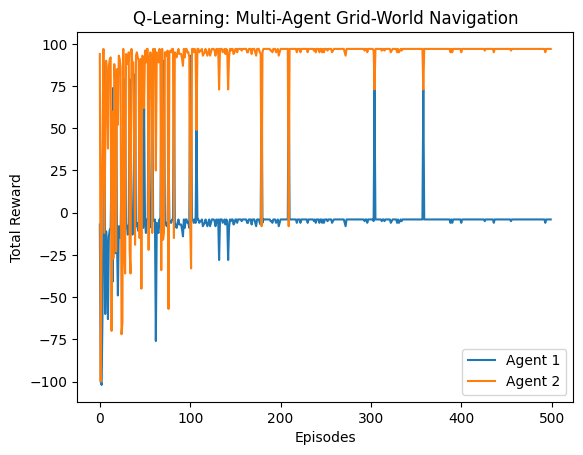

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Multi-Agent Grid-World Environment
class MultiAgentGridWorld:
    def __init__(self, size=5):
        self.size = size
        self.reset()

    def reset(self):
        """
        Reset the environment for a new episode:
        - Set agent 1 at (0, 0)
        - Set agent 2 at (4, 0)
        - Set the goal at (4, 4)
        - Initialize step counter
        """
        self.agent1_pos = [0, 0]  # Agent 1 start position
        self.agent2_pos = [4, 0]  # Agent 2 start position
        self.goal_pos = [4, 4]    # Goal position
        self.steps = 0
        return self.agent1_pos, self.agent2_pos

    def step(self, agent_pos, action):
        """
        Perform a movement for an agent.

        Parameters:
        - agent_pos: Current position of the agent
        - action: Action to take (0=Up, 1=Down, 2=Left, 3=Right)

        Returns:
        - new position
        - reward (reaching goal = +100, hitting wall = -1, otherwise -1)
        """
        # Define movements: up, down, left, right
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}
        new_pos = [agent_pos[0] + moves[action][0], agent_pos[1] + moves[action][1]]

        # Check for boundaries
        if new_pos[0] < 0 or new_pos[0] >= self.size or new_pos[1] < 0 or new_pos[1] >= self.size:
            return agent_pos, -1  # Penalty for hitting the wall

        # Check if goal is reached
        if new_pos == self.goal_pos:
            return new_pos, 100  # Goal reward

        return new_pos, -1  # Normal step penalty

    def play_step(self, action1, action2):
        """
        Perform a step for both agents and handle collisions.

        Parameters:
        - action1: Action for agent 1
        - action2: Action for agent 2

        Returns:
        - rewards for both agents
        - done flag (if goal is reached or max steps exceeded)
        """
        self.steps += 1
        new_agent1_pos, reward1 = self.step(self.agent1_pos, action1)
        new_agent2_pos, reward2 = self.step(self.agent2_pos, action2)

        # Handle collision (if agents move to the same position)
        if new_agent1_pos == new_agent2_pos:
            reward1 -= 20  # Collision penalty for agent 1
            reward2 -= 20  # Collision penalty for agent 2

        # Update positions
        self.agent1_pos = new_agent1_pos
        self.agent2_pos = new_agent2_pos

        # Check if any agent reached the goal
        done = self.agent1_pos == self.goal_pos or self.agent2_pos == self.goal_pos or self.steps >= 100
        return reward1, reward2, done


# Q-Learning Agent Class
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.99):
        """
        Initialize the Q-learning agent.

        Parameters:
        - state_size: Size of the environment grid
        - action_size: Number of possible actions
        - alpha: Learning rate
        - gamma: Discount factor
        - epsilon: Exploration rate
        - epsilon_decay: Decay rate for epsilon
        """
        self.state_size = state_size
        self.action_size = action_size
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((*state_size, action_size))

    def choose_action(self, state):
        """
        Choose an action using epsilon-greedy strategy.

        Parameters:
        - state: Current state (position of the agent)

        Returns:
        - action: Chosen action (integer)
        """
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)  # Explore
        return np.argmax(self.q_table[state[0], state[1]])  # Exploit

    def learn(self, state, action, reward, next_state, done):
        """
        Update the Q-table using the Q-learning update rule.

        Parameters:
        - state: Current state
        - action: Action taken
        - reward: Received reward
        - next_state: Resulting state after taking the action
        - done: Flag indicating if the episode ended
        """
        current_q = self.q_table[state[0], state[1], action]
        max_future_q = np.max(self.q_table[next_state[0], next_state[1]])
        target = reward + self.gamma * max_future_q * (not done)
        self.q_table[state[0], state[1], action] += self.alpha * (target - current_q)

        # Decay epsilon
        if done:
            self.epsilon = max(0.01, self.epsilon * self.epsilon_decay)


# Main Function: Multi-Agent Q-Learning
if __name__ == "__main__":
    env = MultiAgentGridWorld(size=5)
    agent1 = QLearningAgent(state_size=(5, 5), action_size=4)
    agent2 = QLearningAgent(state_size=(5, 5), action_size=4)

    episodes = 500
    rewards_agent1 = []
    rewards_agent2 = []

    for episode in range(episodes):
        state1, state2 = env.reset()
        total_reward1 = 0
        total_reward2 = 0
        done = False

        while not done:
            # Choose actions for both agents
            action1 = agent1.choose_action(state1)
            action2 = agent2.choose_action(state2)

            # Perform the step for both agents
            reward1, reward2, done = env.play_step(action1, action2)

            # Learn for both agents
            next_state1 = env.agent1_pos
            next_state2 = env.agent2_pos

            agent1.learn(state1, action1, reward1, next_state1, done)
            agent2.learn(state2, action2, reward2, next_state2, done)

            # Update states
            state1 = next_state1
            state2 = next_state2

            # Update total rewards
            total_reward1 += reward1
            total_reward2 += reward2

        rewards_agent1.append(total_reward1)
        rewards_agent2.append(total_reward2)

        if (episode + 1) % 50 == 0:
            print(f"Episode {episode+1}: Agent1 Reward = {total_reward1}, Agent2 Reward = {total_reward2}")

    # Plot results
    plt.plot(rewards_agent1, label="Agent 1")
    plt.plot(rewards_agent2, label="Agent 2")
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning: Multi-Agent Grid-World Navigation')
    plt.legend()
    plt.show()
